# Cardiovascular Disease Risk Factor Analysis-Cohort Analytics 

Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

Reading the Dataset

In [2]:
data = pd.read_csv("/Users/rithikak/Downloads/Cardiovascular-Disease-main/Data Sets/values.csv")
data.head()

,patient name,thalassemia,resting bp,chest_pain_type,fasting bs,cholesterol,depression,sex,age,max hr,exercise,heart_disease_present
0,John,normal,128,ATA,No,308,No,Female,45,170,No,No
1,William,normal,110,NAP,No,214,Yes,Male,54,158,No,No
2,James,normal,125,ASY,No,304,No,Female,77,162,Yes,Yes
3,George,reversible_defect,152,ASY,No,223,No,Female,40,181,No,Yes
4,Charles,reversible_defect,178,TA,No,270,Yes,Female,59,145,No,No


### The relation between biological and social factors can be analysed using this cohort

In [3]:
print('Datatype in Each Column')
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis("Column Name")

Datatype in Each Column


,Datatype
Column Name,
patient name,object
thalassemia,object
resting bp,int64
chest_pain_type,object
fasting bs,object
cholesterol,int64
depression,object
sex,object
age,int64


In [4]:
data.describe()

,resting bp,cholesterol,age,max hr
count,180.000000,180.000000,180.000000,180.000000
mean,131.311111,249.211111,54.811111,149.483333
std,17.010443,52.717969,9.334737,22.063513
min,94.000000,126.000000,29.000000,96.000000
25%,120.000000,213.750000,48.000000,132.000000
50%,130.000000,245.500000,55.000000,152.000000
75%,140.000000,281.250000,62.000000,166.250000
max,180.000000,564.000000,77.000000,202.000000


In [5]:
pd.DataFrame(data.isna().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
patient name,0
thalassemia,0
resting bp,0
chest_pain_type,0
fasting bs,0
cholesterol,0
depression,0
sex,0
age,0


Machine Learning

Splitting the data into train and test datasets

In [6]:
data.insert(0, 'id', range(1, 1 + len(data)))
heart_disease_present = {'No': 0, 'Yes': 1}
data.heart_disease_present = [heart_disease_present[item] for item in data.heart_disease_present]
data.head()

,id,patient name,thalassemia,resting bp,chest_pain_type,fasting bs,cholesterol,depression,sex,age,max hr,exercise,heart_disease_present
0,1,John,normal,128,ATA,No,308,No,Female,45,170,No,0
1,2,William,normal,110,NAP,No,214,Yes,Male,54,158,No,0
2,3,James,normal,125,ASY,No,304,No,Female,77,162,Yes,1
3,4,George,reversible_defect,152,ASY,No,223,No,Female,40,181,No,1
4,5,Charles,reversible_defect,178,TA,No,270,Yes,Female,59,145,No,0


Splitting the data into train and test datasets

In [7]:
#Splitting the independent variables and target variable -stroke classification
X = data.drop(["id","heart_disease_present"], axis=1)
y = data["heart_disease_present"]
y= pd.DataFrame(y,columns=["heart_disease_present"])

Encoding categorical variables

In [8]:
def sexEncoder(df):
 labelEncoder = LabelEncoder()
 df["sex"] = labelEncoder.fit_transform(df["sex"])
 df.head()
#male-1
#female-0

In [9]:
sexEncoder(data)

Standardizing the data

In [10]:
numeric_cols = X.select_dtypes(["float64","int64"])
scaler = StandardScaler()
X[numeric_cols.columns] = scaler.fit_transform(X[numeric_cols.columns])

In [11]:
numeric_cols=X[numeric_cols.columns].round(2)

In [12]:
numeric_cols.head()

,resting bp,cholesterol,age,max hr
0,-0.20,1.12,-1.05,0.93
1,-1.26,-0.67,-0.09,0.39
2,-0.37,1.04,2.38,0.57
3,1.22,-0.50,-1.59,1.43
4,2.75,0.40,0.45,-0.20


In [13]:
categorical_vbles = X.select_dtypes("object")
X = pd.get_dummies(X, columns=categorical_vbles.columns)

In [14]:
categorical_vbles=X.round(2)

In [15]:
categorical_vbles.shape

(180, 197)

In [16]:
data=pd.concat([categorical_vbles,y],axis=1)
data=data.dropna()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model_comparison = pd.DataFrame(columns=["Model","Accuracy Score"])

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(solver = "liblinear",random_state=0)
logit.fit(X_train,y_train)
y_pred = logit.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(f"Logistic Regression: {score}")

Logistic Regression: 0.8148148148148148


In [27]:
add_model={"Model": "LogisticRegression", "Accuracy Score": round(score,4)}
model_comparison = pd.concat([model_comparison, pd.DataFrame([add_model])], ignore_index=True)

K-nearest Neighbours

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
score_knn =accuracy_score(y_test, y_pred)
print(f"KNeighborsClassifier: {score_knn}")

KNeighborsClassifier: 0.7962962962962963


In [29]:
add_model={"Model": "KNeighborsClassifier", "Accuracy Score": round(score,4)}
model_comparison = pd.concat([model_comparison, pd.DataFrame([add_model])], ignore_index=True)

Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.003)
dtc.fit(X_train,y_train)
y_Pred = dtc.predict(X_test)
score = accuracy_score(y_Pred, y_test)
print(f"DecisionTreeClassifier: {score}")

DecisionTreeClassifier: 0.7222222222222222


In [31]:
add_model={"Model": "DecisionTreeClassifier", "Accuracy Score": round(score,4)}
model_comparison = pd.concat([model_comparison, pd.DataFrame([add_model])], ignore_index=True)

Random Forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=1000, random_state=30)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(f"RandomForestClassifier: {score}")

RandomForestClassifier: 0.8333333333333334


In [33]:
add_model={"Model": "RandomForestClassifier", "Accuracy Score": round(score,4)}
model_comparison = pd.concat([model_comparison, pd.DataFrame([add_model])], ignore_index=True)

Models and Accuracy Scores

In [34]:
model_comparison

,Model,Accuracy Score
0,LogisticRegression,0.8148
1,KNeighborsClassifier,0.8148
2,DecisionTreeClassifier,0.7222
3,RandomForestClassifier,0.8333


ROC Curve

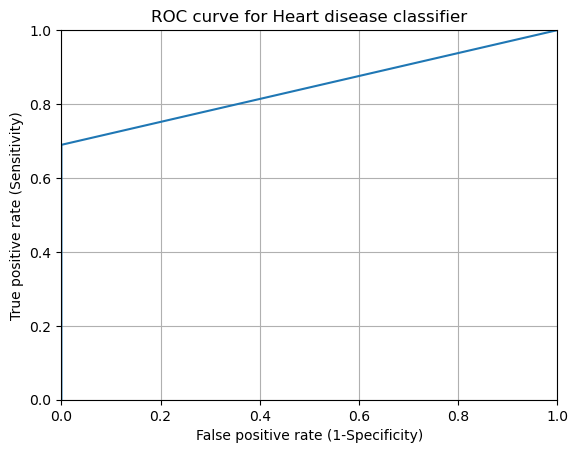

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [36]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8448275862068966